# Declaration of Originality

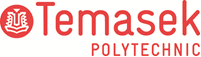

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Business Understanding
Goal: Predict air quality levels in the major global cities based on the pollutant concentrations and the weather conditions.

# 2. Data Understanding

## 2.1 Load dataset

In [40]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('global_air_quality_data_10000.csv')
df = df.drop(['Date'], axis=1)
df

,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...,...,...,...,...
9995,Johannesburg,South Africa,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71


## 2.2 Summary Statistics

In [ ]:
## Understand the type of variable for each column
df.shape
df.dtypes

City            object
Country         object
Date            object
PM2.5          float64
PM10           float64
NO2            float64
SO2            float64
CO             float64
O3             float64
Temperature    float64
Humidity       float64
Wind Speed     float64
dtype: object

In [63]:
df.corr


<bound method DataFrame.corr of                 City       Country        Date   PM2.5    PM10    NO2    SO2  \
0            Bangkok      Thailand  2023-03-19   86.57   25.19  99.88  30.63   
1           Istanbul        Turkey  2023-02-16   50.63   97.39  48.14   8.71   
2     Rio de Janeiro        Brazil  2023-11-13  130.21   57.22  98.51   9.92   
3             Mumbai         India  2023-03-16  119.70  130.52  10.96  33.03   
4              Paris        France  2023-04-04   55.20   36.62  76.85  21.85   
...              ...           ...         ...     ...     ...    ...    ...   
9995    Johannesburg  South Africa  2023-09-16  147.85  184.34  90.33  34.93   
9996          Berlin       Germany  2023-12-05   12.22  121.49  49.04   5.66   
9997          Moscow        Russia  2023-11-26   44.07  143.62   8.41  32.58   
9998          Berlin       Germany  2023-02-03   67.43   96.79  43.23  29.19   
9999         Bangkok      Thailand  2023-06-13   16.34   28.80  50.48  21.20   

       

In [ ]:
## Check for missing data
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


City             20
Country          19
Date            336
PM2.5          7214
PM10           7767
NO2            6162
SO2            4276
CO              990
O3             7741
Temperature    4319
Humidity       6010
Wind Speed     1940
dtype: int64

In [ ]:
## Describe data distribution
# Check column names first
print("Column names in dataset:")
print(df.columns.tolist())

df.describe(include='all')

Column names in dataset:
['City', 'Country', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temperature', 'Humidity', 'Wind Speed']


,City,Country,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
unique,20,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mumbai,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,540,962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,NaN,NaN,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,NaN,NaN,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,NaN,NaN,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,NaN,NaN,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,NaN,NaN,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

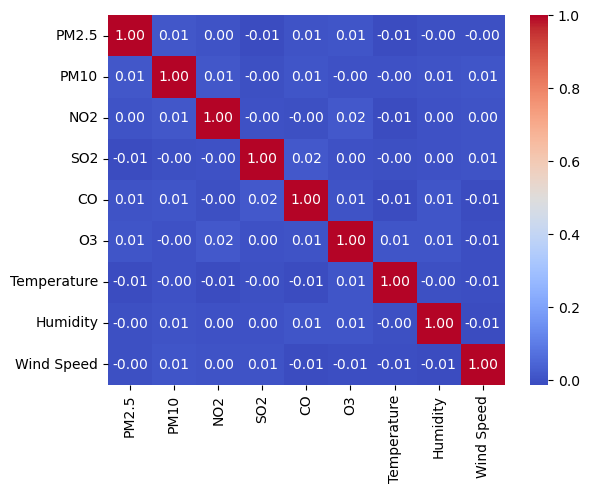

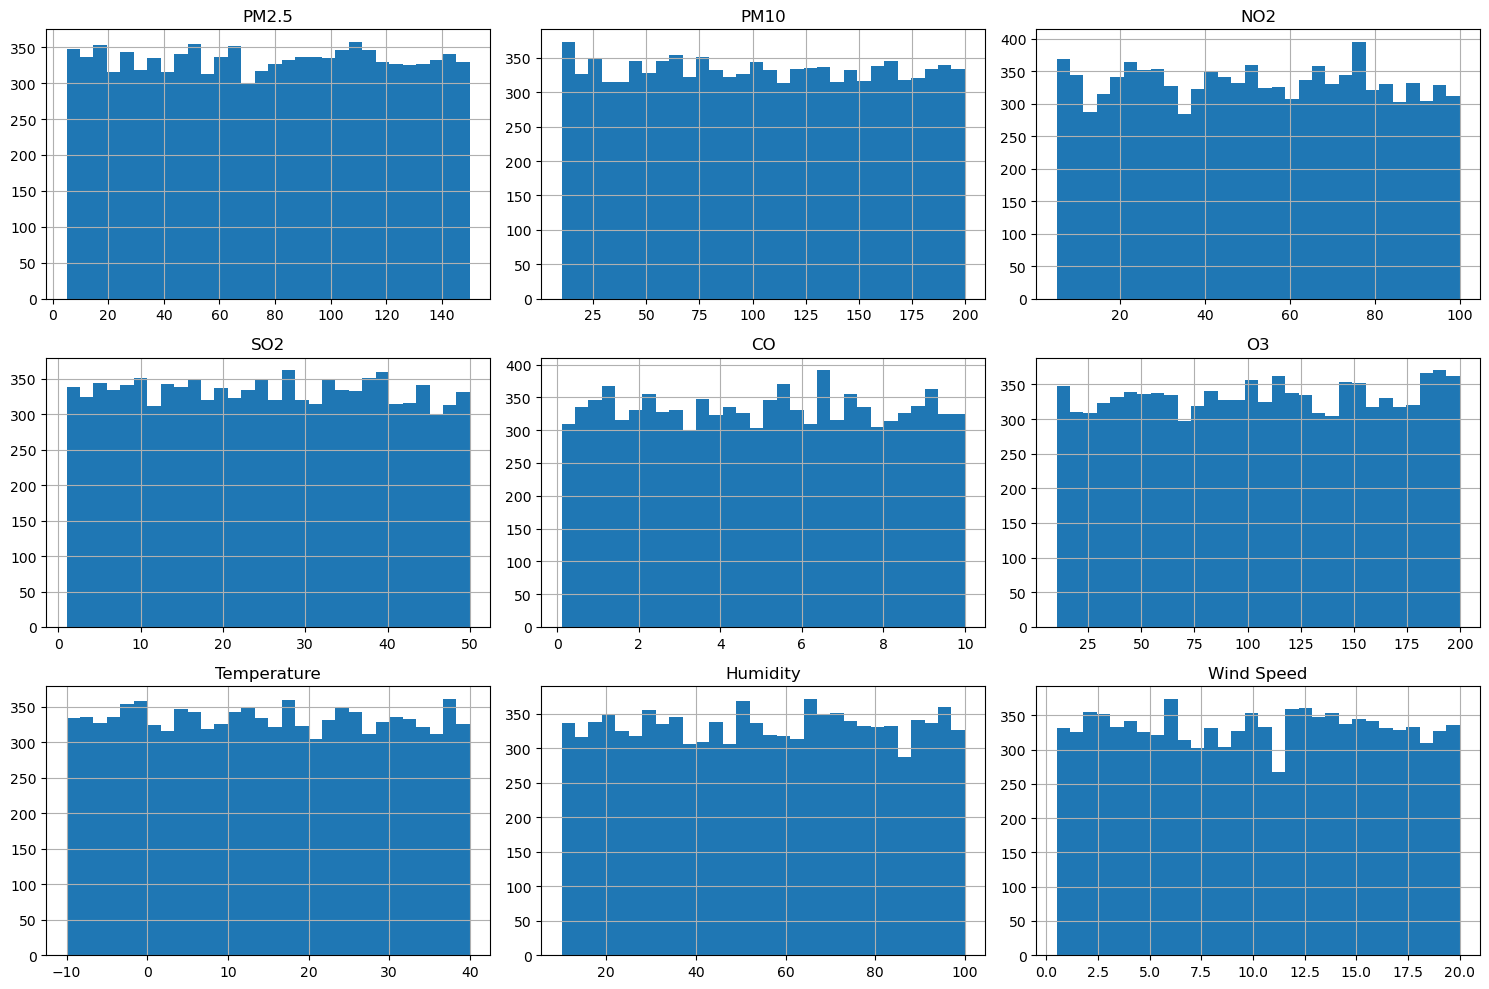

In [ ]:
## Understanding distribution of target



### 2.3.1.2 Understanding distribution of features

In [ ]:
## Understanding distribution of features


### 2.3.2 Understanding relationship between variables

In [ ]:
## Understanding relationship between variables


# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection